<a href="https://colab.research.google.com/github/ibacaraujo/fastai-research/blob/master/research_lesson02_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research and development predicated on Lesson 02. Stochastic Gradient Descent.

In [1]:
import fastai
fastai.__version__

'1.0.52'

In [0]:
%matplotlib inline
from fastai.basics import *

This notebook is all about Stochastic Gradient Descent (SGD), an optimization method commonly used in neural networks. Let's work on it with examples.

## Linear Regression problem.

The goal of linear regression is to fit a line to a set of points.

In [0]:
n = 100 # the number of points

In [0]:
x = torch.ones(n,2) # we create a tensor of ones with shape (n,2)
x[:,0].uniform_(-1,1); # we update all lines in first column

In [7]:
x[:5] # to show the first five rows

tensor([[-0.9596,  1.0000],
        [ 0.0554,  1.0000],
        [ 0.5836,  1.0000],
        [-0.0176,  1.0000],
        [ 0.0530,  1.0000]])

In [9]:
a = tensor(3.,2) # create a tensor with 1 row and 2 columns with these values
a

tensor([3., 2.])

In [11]:
torch.randn(n) # return a tensor with n numbers randomly between (-1,1)

tensor([-2.0866, -2.1040, -0.1029,  0.4389,  0.0104,  2.0791, -1.0971,  1.9612,
        -0.9189,  0.2691, -0.8158, -0.4096,  1.4056, -0.7664, -1.7934, -0.4117,
        -0.3384, -1.0379,  0.5055, -0.2547, -1.4074, -1.3561,  0.3061, -0.6237,
         0.3416,  0.9099, -0.3938, -1.0853,  0.1240, -0.2561,  0.5049, -2.0240,
         0.2520,  0.3577,  1.1830,  1.6309, -0.3706, -0.9066,  0.4588, -1.0106,
        -1.1270, -1.5307,  0.6425,  0.1563,  1.5607,  1.7366, -1.4265,  0.7547,
        -0.1006,  0.8458, -0.7318,  0.1554,  0.2615,  0.7328,  0.1399,  0.1335,
         0.5842,  2.0645,  0.5423,  1.6041, -0.4475,  1.2408, -0.0699,  0.3065,
         0.9420, -0.7875,  0.0984,  0.6746,  0.1049,  0.3509, -0.2987, -0.4933,
         0.9784,  0.4750,  0.2842, -1.1418, -0.8085,  0.7865, -0.6896,  1.3654,
         0.1717, -0.2926,  0.2463, -1.3031,  0.0875,  0.2576, -0.6069, -0.6615,
         0.0814,  0.5619, -0.1863, -0.2728,  0.2692,  0.5757, -1.0127, -0.8221,
        -0.1078, -0.5866,  0.8772, -0.75

In [20]:
# let's define now a dependent variable y in terms of x and a and a noise
y = x@a + torch.randn(n)
# the shape of y is [100] given (n,2) x (2, 1) = (n, 1)
y.shape

torch.Size([100])

In [22]:
y[:5] # show the first five vlaues

tensor([-1.6678,  1.7488,  5.2792,  1.6941,  2.3979])

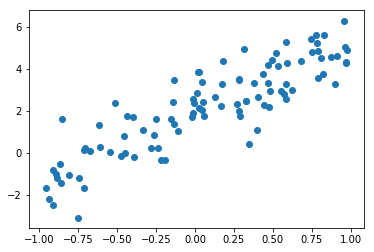

In [23]:
plt.scatter(x[:,0], y); # plot x0 with y

Given that context and plot, we want to find **parameters** (weights) *a* such that we minimize the *error* between the points from ```x``` and ```y```. Note that here *a* is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
# define the mean squared error function
def mse(y_hat, y):
  return ((y_hat - y)**2).mean()

Suppose that we think ```a = tensor(-1.,1)``` then we can compute y_hat, which is our *prediction*, and then compute our error.

In [0]:
a = tensor(-1.,1) # supposed a

In [0]:
y_hat = x@a # our prediction

In [32]:
error = mse(y_hat, y); error # the error

tensor(8.4229)

Let's plot the feature x0 with the true answer y and the feature x0 with the prediction y_hat.

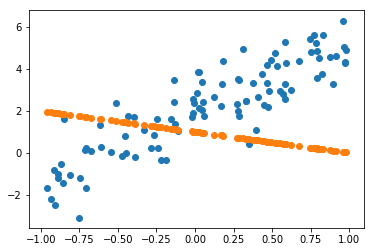

In [33]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

So far we have specified the *model* (linear regression) and the *evaluation criteria* or *loss function* (mean squared error). Now we need to handle the *optimization*, that is, how do we find the best values for ```a```. How do we find the best *fitting* linear regression.

## Gradient Descent

We would like to find values to minimize the mean squared error loss.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Let's use PyTorch to implement the operation of updating parameters to improve the results with the minimization of the error.

In [34]:
a = nn.Parameter(a); a # we convert a to be a Parameter, so it has grad function

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y_hat, y)
  if t % 10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr*a.grad)
    a.grad.zero_()

In [36]:
lr = 1e-1
for t in range(100):
  update()

tensor(8.4229, grad_fn=<MeanBackward0>)
tensor(2.4507, grad_fn=<MeanBackward0>)
tensor(1.3841, grad_fn=<MeanBackward0>)
tensor(1.1071, grad_fn=<MeanBackward0>)
tensor(1.0338, grad_fn=<MeanBackward0>)
tensor(1.0143, grad_fn=<MeanBackward0>)
tensor(1.0092, grad_fn=<MeanBackward0>)
tensor(1.0078, grad_fn=<MeanBackward0>)
tensor(1.0074, grad_fn=<MeanBackward0>)
tensor(1.0073, grad_fn=<MeanBackward0>)


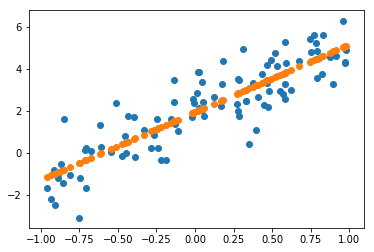

In [37]:
# let's plot the new predictions
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a)

Great! In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

For classification problems, we use *cross-entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.